In [1]:
!pip install category_encoders


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from scipy.stats import shapiro
import scipy.stats as stats 
import pingouin as pg
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('hr_df.csv')

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df_2 = df[['Department','MonthlyIncome']]
df_2

,Department,MonthlyIncome
0,Sales,5993
1,Research & Development,5130
2,Research & Development,2090
3,Research & Development,2909
4,Research & Development,3468
...,...,...
1465,Research & Development,2571
1466,Research & Development,9991
1467,Research & Development,6142
1468,Sales,5390


<AxesSubplot: xlabel='Department', ylabel='MonthlyIncome'>

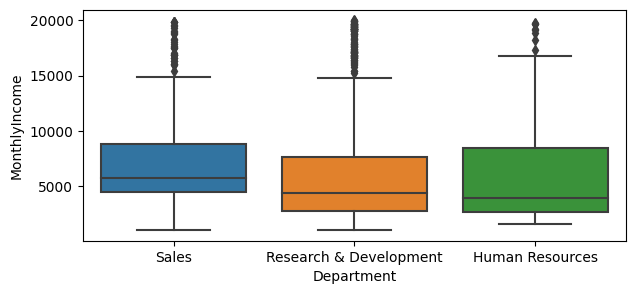

In [8]:
plt.figure(figsize=(7,3))
sns.boxplot(x='Department', y='MonthlyIncome', data=df_2)

In [11]:
Sales = df_2[df_2['Department'] == 'Sales']
RnD = df_2[df_2['Department'] == 'Research & Development']
HR = df_2[df_2['Department'] == 'Human Resources']

In [12]:
print('Sales 평균 월급: ', Sales.MonthlyIncome.mean())
print('Sales 월급 표준편차: ', Sales.MonthlyIncome.std())

print('---------------------')

print('RnD 평균 월급: ', RnD.MonthlyIncome.mean())
print('RnD 월급 표준편차: ', RnD.MonthlyIncome.std())

print('---------------------')

print('HR 평균 월급: ', HR.MonthlyIncome.mean())
print('HR 월급 표준편차: ', HR.MonthlyIncome.std())

Sales 평균 월급:  6959.17264573991
Sales 월급 표준편차:  4058.7393215429383
---------------------
RnD 평균 월급:  6281.252861602497
RnD 월급 표준편차:  4895.835087470037
---------------------
HR 평균 월급:  6654.507936507936
HR 월급 표준편차:  5788.732921340681


In [13]:
import pingouin as pg

pg.ttest(Sales.MonthlyIncome, RnD.MonthlyIncome, confidence = 0.95)

# 영업부 - R&D 차이 O

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.72528,1030.991688,two-sided,0.006533,"[189.8, 1166.04]",0.145882,2.497,0.720541


In [14]:
pg.ttest(Sales.MonthlyIncome, HR.MonthlyIncome, confidence = 0.95)

# 영업부 - 인사부 차이 X

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.403953,70.862149,two-sided,0.687464,"[-1199.24, 1808.57]",0.070725,0.159,0.082062


In [15]:
pg.ttest(RnD.MonthlyIncome, HR.MonthlyIncome, confidence = 0.95)

# R&D - 인사부 차이 X

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.500197,67.941358,two-sided,0.618552,"[-1862.33, 1115.82]",0.075335,0.16,0.089166


In [16]:
df_3 = df[['Attrition','MonthlyIncome']]
df_3

,Attrition,MonthlyIncome
0,0,5993
1,1,5130
2,0,2090
3,1,2909
4,1,3468
...,...,...
1465,1,2571
1466,1,9991
1467,1,6142
1468,1,5390


In [17]:
att = df_3[df_3['Attrition'] == 0]
not_att = df_3[df_3['Attrition'] == 1]

In [18]:
print('퇴사자 평균 월급: ', att.MonthlyIncome.mean())
print('퇴사자 월급 표준편차: ', att.MonthlyIncome.std())

print('---------------------')

print('비퇴사자 평균 월급: ', not_att.MonthlyIncome.mean())
print('비퇴사자 월급 표준편차: ', not_att.MonthlyIncome.std())

퇴사자 평균 월급:  4787.0928270042195
퇴사자 월급 표준편차:  3640.210367103852
---------------------
비퇴사자 평균 월급:  6832.739659367397
비퇴사자 월급 표준편차:  4818.208000784481


In [19]:
pg.ttest(att.MonthlyIncome, not_att.MonthlyIncome, confidence = 0.95)

# 퇴사자 월급 - 비퇴사자 월급 차이 O

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.482622,412.740748,two-sided,4.433589e-13,"[-2583.05, -1508.24]",0.440018,4.471e+10,1.0


In [20]:
df_4 = df[['Attrition', 'Department', 'MonthlyIncome']]
df_4

,Attrition,Department,MonthlyIncome
0,0,Sales,5993
1,1,Research & Development,5130
2,0,Research & Development,2090
3,1,Research & Development,2909
4,1,Research & Development,3468
...,...,...,...
1465,1,Research & Development,2571
1466,1,Research & Development,9991
1467,1,Research & Development,6142
1468,1,Sales,5390


In [21]:
from sklearn.model_selection import train_test_split
X = df_4.drop('Attrition', axis=1)
y = df_4['Attrition']

# 테스트 사이즈 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# train, test 데이터가 잘 나눠졌는지 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 2), (294, 2), (1176,), (294,))

In [24]:
# 기준 모델 

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

base = y_train.mode()[0]
# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듦. 기준모델로 예측
baseline = len(y_train) * [base]

baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도: {baseline_acc.round(2)}')


baseline_r2 = r2_score(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')

baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 mae : {baseline_mae}')

기준모델 정확도: 0.83
기준모델의 r2_score: -0.2024539877300615
기준모델의 mae : 0.1683673469387755


In [27]:
cat = ['Attrition', 'Department', 'MonthlyIncome']

In [28]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df[cat])

OneHotEncoder(cols=['Department'], handle_unknown='ignore')

In [29]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [30]:
X_train

,Department_1,Department_2,Department_3,MonthlyIncome
1097,1,0,0,2296
727,1,0,0,1051
254,0,1,0,6931
1175,1,0,0,5295
1341,1,0,0,4197
...,...,...,...,...
1130,1,0,0,3407
1294,1,0,0,6870
860,1,0,0,2853
1459,1,0,0,4025


In [31]:
# 랜덤포레스트

model = RandomForestClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.9846938775510204
Test accuracy score:0.7789115646258503


In [33]:
from xgboost import XGBClassifier

In [34]:
# XGBoost

model = XGBClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.8945578231292517
Test accuracy score:0.8401360544217688


In [37]:
test = pd.DataFrame([[1, 0, 0, 1051]], columns=['Department_1','Department_2', 'Department_3', 'MonthlyIncome'])
result = model.predict(test)
result

array([0])

In [38]:
test2 = pd.DataFrame([[1, 0, 0, 19331]], columns=['Department_1','Department_2', 'Department_3', 'MonthlyIncome'])
result2 = model.predict(test2)
result2

array([1])